In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x1, x2):
    return x1**2 / 20.0 + x2**2

def df(x1, x2):
    return x1 / 10.0, 2.0*x2

In [6]:
class Momentum:
    def __init__(self, eta=0.1, momentum=0.9):
        self.eta = eta
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, w in params.items():                                
                self.v[key] = np.zeros_like(w)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.eta*grads[key] 
            params[key] += self.v[key]

## Momentum

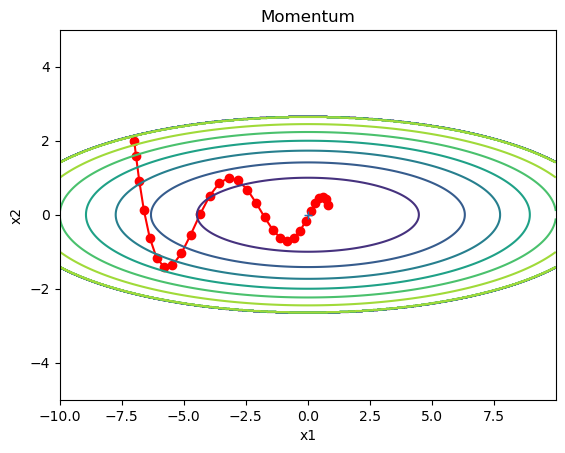

In [8]:
x1_history = []
x2_history = []
params = {}
grads = {}
params['x1'], params['x2'] = -7.0, 2.0

optimizer = Momentum() # optimizer를 Momentum으로 바꾼 것
    
for i in range(30):
    x1_history.append(params['x1'])
    x2_history.append(params['x2'])
        
    grads['x1'], grads['x2'] = df(params['x1'], params['x2'])
    optimizer.update(params, grads)    

scope1 = np.arange(-10, 10, 0.01)
scope2 = np.arange(-5, 5, 0.01)    
X, Y = np.meshgrid(scope1, scope2) 
Z = f(X, Y)
    
# 외곽선 단순화
mask = Z > 7
Z[mask] = 0
    
plt.plot(x1_history, x2_history, 'o-', color="red")
plt.contour(X, Y, Z)
plt.plot(0, 0, '+')
plt.title('Momentum')
plt.xlabel("x1")
plt.ylabel("x2")
    
plt.show()